<a href="https://colab.research.google.com/github/K-107/dki/blob/main/211122_img_%ED%95%A9%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://soyoung-new-challenge.tistory.com/112

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from google.colab.patches import cv2_imshow

In [170]:
data_path = '/content/drive/MyDrive/음식인식/data'
label_path = '/content/drive/MyDrive/음식인식/label'
back_path = '/content/drive/MyDrive/음식인식/back'
result_path = '/content/drive/MyDrive/음식인식/result'

In [168]:
a = sorted(os.listdir(label_path))
a

['0.jpg', '1.jpg']

In [180]:
for num, img in enumerate(sorted(os.listdir(label_path))):
  print(img)
  data_img = cv2.imread(data_path+'/'+img, cv2.IMREAD_ANYCOLOR)
  label_img = cv2.imread(label_path+'/'+img, cv2.IMREAD_ANYCOLOR)
  back_num = str(np.random.randint(0, len(os.listdir(back_path))))
  back_img = cv2.imread(back_path+'/'+back_num+'.jpg', cv2.IMREAD_ANYCOLOR)

  data_img = np.array(data_img)
  label_img = np.array(label_img)
  back_img = cv2.resize(back_img, dsize=(label_img.shape[0],label_img.shape[1]), interpolation=cv2.INTER_AREA)

  if (data_img.shape != label_img.shape) and (label_img.shape != back_img.shape):
    print('shape이 다르다!')

  result = np.where(label_img == 0, back_img, data_img)

  result_img = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
  cv2.imwrite(f'/content/drive/MyDrive/음식인식/result/{num}.jpg', cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR))

0.jpg
1.jpg


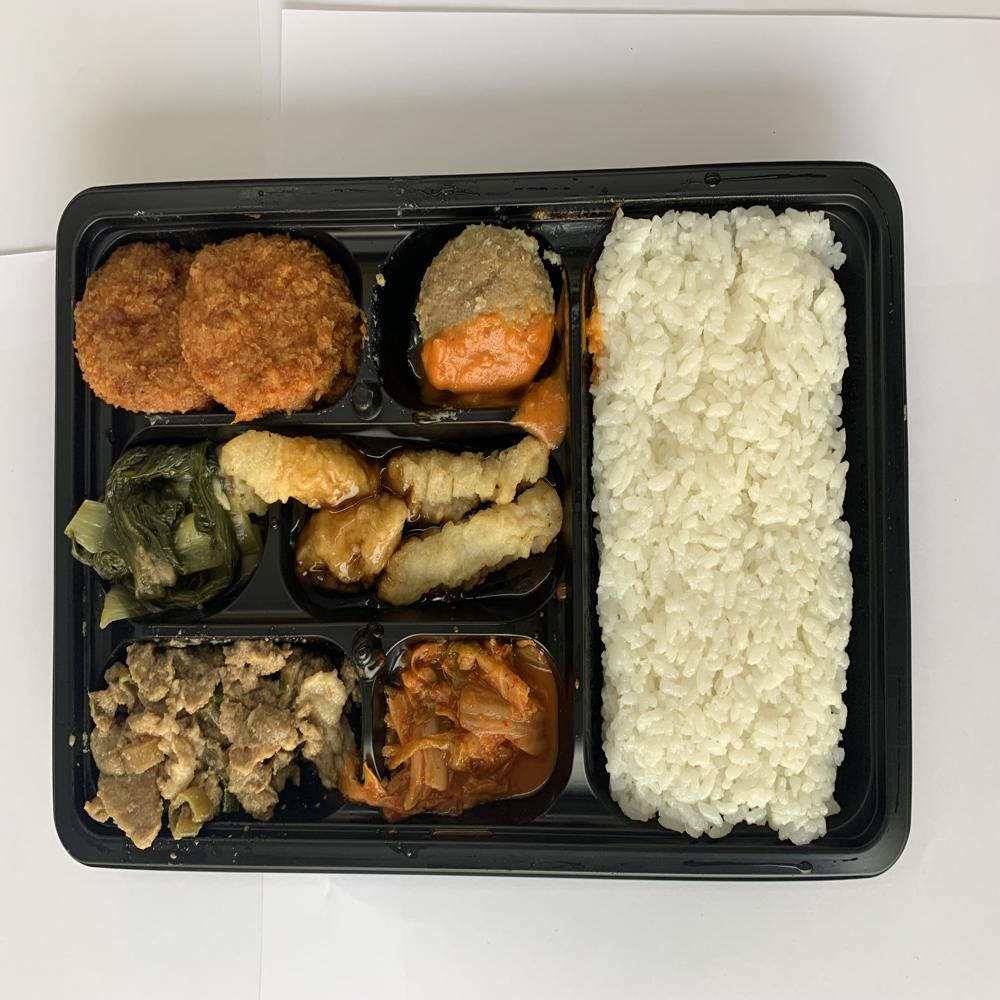

In [7]:
# 데이터
file_name = os.listdir(data_path)[0]

data_img = cv2.imread(data_path+'/'+file_name, cv2.IMREAD_ANYCOLOR)
cv2_imshow(data_img)

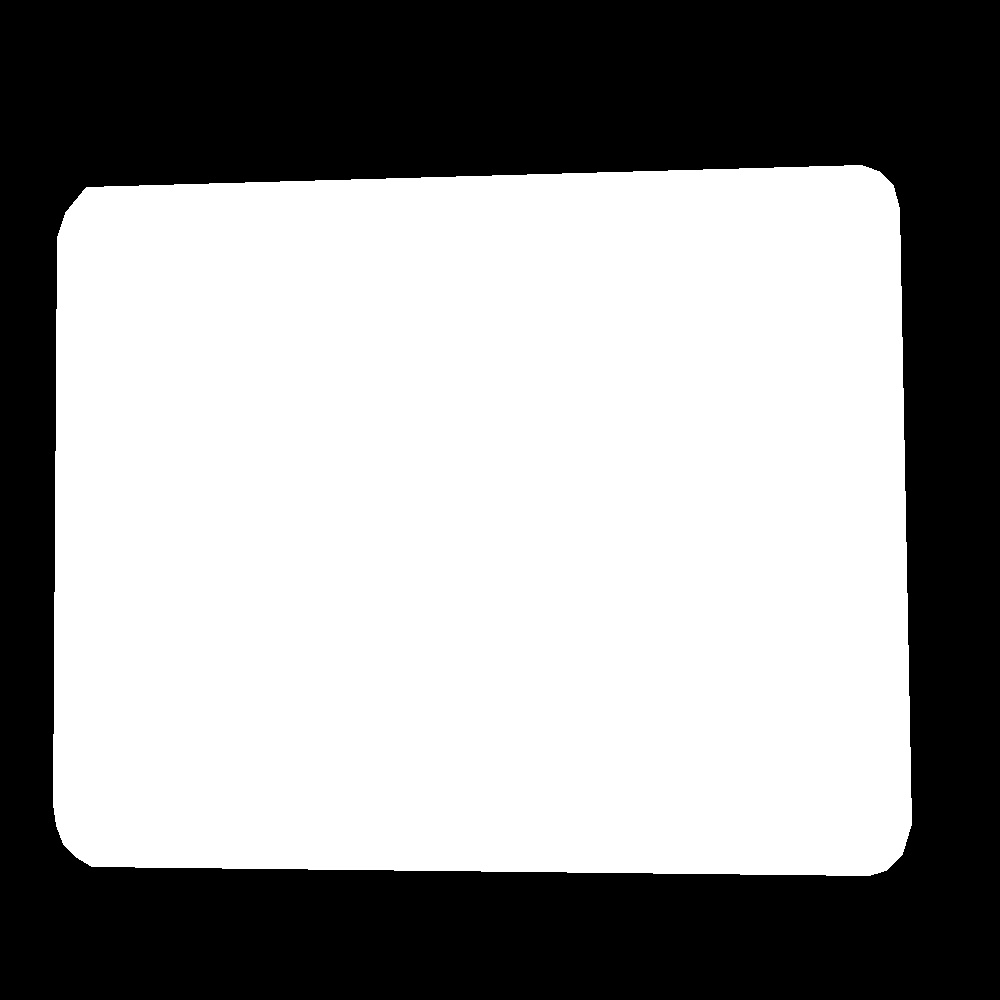

In [16]:
# 레이블
file_name = os.listdir(label_path)[1]

label_img = cv2.imread(label_path+'/'+file_name, cv2.IMREAD_ANYCOLOR)
cv2_imshow(label_img)

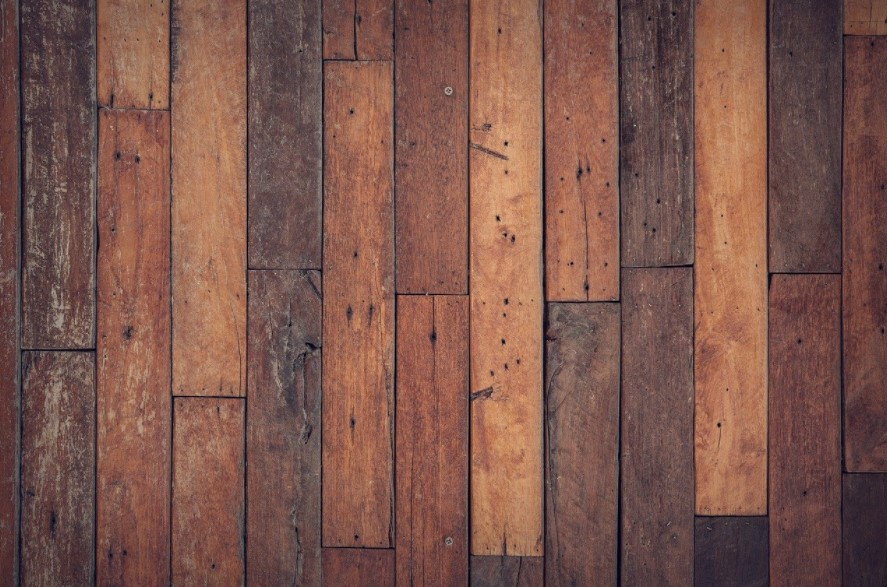

In [23]:
# 배경
file_name = os.listdir(back_path)[0]

back_img = cv2.imread(back_path+'/'+file_name, cv2.IMREAD_ANYCOLOR)
cv2_imshow(back_img)

In [30]:
data_img = np.array(data_img)
label_img = np.array(label_img)
back_img = cv2.resize(back_img, dsize=(1000,1000), interpolation=cv2.INTER_AREA)

data_img.shape, label_img.shape, back_img.shape

((1000, 1000, 3), (1000, 1000, 3), (1000, 1000, 3))

In [38]:
zero_img = np.zeros((1000,1000,3))
zero_img.shape

(1000, 1000, 3)

In [36]:
label_img[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
a = np.where(label_img == 0, back_img, data_img)
a

array([[[ 48,  44,  63],
        [ 43,  39,  58],
        [ 68,  66,  85],
        ...,
        [ 58,  70, 104],
        [ 66,  79, 113],
        [ 56,  71, 104]],

       [[ 47,  43,  62],
        [ 46,  42,  61],
        [ 67,  64,  83],
        ...,
        [ 58,  70, 104],
        [ 66,  78, 112],
        [ 55,  70, 103]],

       [[ 46,  42,  61],
        [ 55,  51,  70],
        [ 64,  62,  81],
        ...,
        [ 59,  71, 105],
        [ 64,  77, 111],
        [ 53,  68, 101]],

       ...,

       [[ 37,  39,  70],
        [ 38,  40,  70],
        [ 41,  40,  69],
        ...,
        [ 43,  30,  38],
        [ 39,  26,  34],
        [ 40,  25,  33]],

       [[ 36,  38,  69],
        [ 38,  40,  70],
        [ 41,  40,  70],
        ...,
        [ 43,  29,  37],
        [ 39,  24,  33],
        [ 39,  24,  32]],

       [[ 36,  38,  69],
        [ 38,  40,  70],
        [ 42,  41,  70],
        ...,
        [ 43,  28,  36],
        [ 39,  24,  32],
        [ 39,  24,  32]]

In [89]:
a.dtype, a.shape

(dtype('uint8'), (1000, 1000, 3))

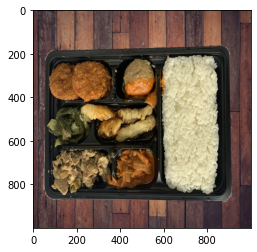

In [90]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(a)

In [94]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/drive/MyDrive/음식인식/result/result.png', a)

True